In [12]:
# !pip install scipy
# !pip install torchsummary
# !pip install tensorboard
# % pip

In [13]:
# import os
# from torch.utils.data import Dataset
# from scipy.io import loadmat


# device = torch.device("cuda:0")

# t = torch.Tensor(1)
# t.to(device);
# Describle = loadmat('./DatadDescribe.mat')
# # Describle

# 前向过程

In [1]:
import torch
from model import NetForward
from database import kWaveDatasetTrain

# test
device = torch.device('cuda')
net = NetForward().to(device)
net.load_state_dict(torch.load('NetForwardWeights.pth'))

data = kWaveDatasetTrain()
[L0,P0] = data[7000];


P0, L0 = P0.to(device), L0.to(device)

Recon = net(P0.unsqueeze_(0))

Recon, L0 = Recon.view(64,415), L0.view(64,415)

(Recon-L0).pow(2).sum()

tensor(0.4956, device='cuda:0', grad_fn=<SumBackward0>)

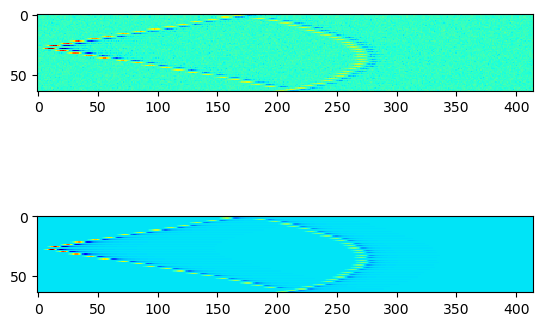

In [2]:
import matplotlib.pyplot as plt
Re = Recon.cpu()
Re = Re.detach().numpy()
Re = Re.squeeze()
plt.subplot(2,1,1)
plt.imshow(Re, cmap='jet', interpolation='nearest')

plt.subplot(2,1,2)
plt.imshow(L0.to('cpu'), cmap='jet', interpolation='nearest')

plt.show()

# 反向过程

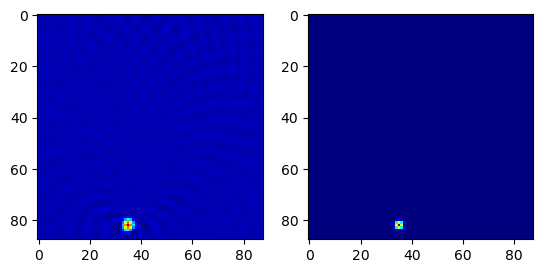

In [7]:
import torch
from model import NetBackward
from database import kWaveDatasetTrain

# test
device = torch.device('cuda')
net = NetBackward().to(device)
net.load_state_dict(torch.load('NetBackwardWeights.pth'))

data = kWaveDatasetTrain()
[L0,P0] = data[7000];


P0, L0 = P0.to(device), L0.to(device)

Recon = net(L0.unsqueeze_(0))

Recon, P0 = Recon.view(88,88), P0.view(88,88)

(Recon-P0).pow(2).sum()
import matplotlib.pyplot as plt
Re = Recon.cpu()
Re = Re.detach().numpy()
Re = Re.squeeze()
plt.subplot(1,2,1)
plt.imshow(Re, cmap='jet', interpolation='nearest')

plt.subplot(1,2,2)
plt.imshow(P0.to('cpu'), cmap='jet', interpolation='nearest')

plt.show()

# TOF 去噪

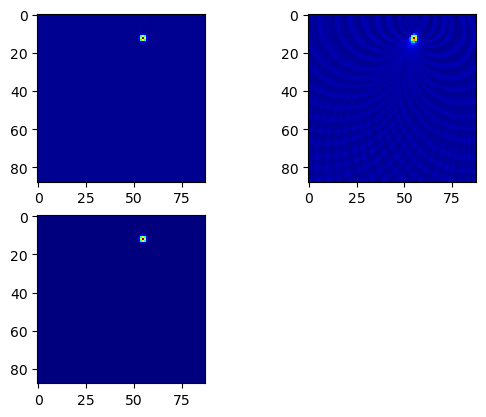

In [6]:
import torch
from model import NetBackwardTOF
from database import TOFkWaveDatasetTrain
from scipy.io import loadmat
from torch import Tensor


Recondescribe = loadmat('./ReconDescribe.mat')

SpeedofSound = Tensor([1500])
dt = Tensor(Recondescribe['dt'])
sensor_location_x = Tensor(Recondescribe['sensor_location_x'])
sensor_location_y = Tensor(Recondescribe['sensor_location_y'])
p0_recon_location_x = Tensor(Recondescribe['p0_recon_location_x'])
p0_recon_location_y = Tensor(Recondescribe['p0_recon_location_y'])




import matplotlib.pyplot as plt
# data = kWaveDataset()
# [TOF, P0] = data[0];

# P0, TOF = P0.to(device), TOF.to(device)
# for i in range(25):
#     a = TOF[i,:,:]
#     a.size()
#     plt.subplot(5,5,i+1)
#     plt.imshow(a.cpu().detach().numpy(), cmap='jet', interpolation='nearest')
# plt.show()


# TOFSum = torch.sum(TOF, dim=0)
# plt.imshow(TOFSum.to('cpu'), cmap='jet', interpolation='nearest')
# plt.show()

# plt.imshow(P0.to('cpu'), cmap='jet', interpolation='nearest')
# plt.show()

device = torch.device('cuda')
net = NetBackwardTOF().to(device)
net.load_state_dict(torch.load('NetBackwardTOFWeights.pth'))
data = TOFkWaveDatasetTrain()
[TOF, P0] = data[1000];

P0, TOF = P0.to(device), TOF.to(device)
TOFu = TOF.unsqueeze(0)
Re1 = net(TOFu)

import matplotlib.pyplot as plt

Re = Re1.cpu()
Re = Re.detach().numpy()
Re = Re.squeeze()

plt.subplot(2, 2, 1)
plt.imshow(Re, cmap='jet', interpolation='nearest')

plt.subplot(2, 2, 2)
# plt.imshow(P0.to('cpu'), cmap='jet', interpolation='nearest')

TOFSum = torch.sum(TOF, dim=0)
plt.imshow(TOFSum.to('cpu'), cmap='jet', interpolation='nearest')


plt.subplot(2,2,3)
plt.imshow(P0.to('cpu'), cmap='jet', interpolation='nearest')
# plt.imshow(L0.to('cpu'), cmap='jet', interpolation='nearest')

plt.show()

In [14]:
# 评价指标

# (Re1.squeeze_()-P0).pow(2).sum(), (TOFSum-P0).pow(2).sum()

# import torch
# import torchvision

# MSE = torch.nn.MSELoss(Re1,P0)

# PSNR = 10*torch.log10(1/MSE)

# SSIM = torchvision.metric.SSIM
